# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Patric Marsa Tonapa]
- **Email:** [patricmarsa66@gmail.com]
- **ID Dicoding:** [Input ]

## Menentukan Pertanyaan Bisnis

- Kapan jumlah penyewaan sepeda mencapai tingkat tertinggi dan terendah?
- Bagaimana variasi jumlah penyewaan sepeda pada setiap hari dalam seminggu?
- Pada jam berapa dalam sehari jumlah penyewaan sepeda paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat data day_df

In [50]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat data hour_df

In [51]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Perbedaan kedua data ada pada data hour_df dimana data tersebut memiliki kolom hr (hour)

### Assessing Data

#### Menilai data day_df

In [52]:
#Memeriksa tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [53]:
#Memerikasa missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [54]:
#Memeriksa duplikasi data
print("Jumlah data duplikat: ", day_df.duplicated().sum())


Jumlah data duplikat:  0


In [55]:
#Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data hour_df

In [56]:
#Memeriksa tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
#Memeriksa missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [58]:
#Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [59]:
#Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- day_df
    - Terdapat kesalahan tipe data pada kolom dteday dengan tipe data object yang seharusnya date time
    - Tidak terdapat missing value
    - Tidak terdapat duplikasi data
    - Parameter statistik normal
- hour_df
    - Tipe data dteday adalah object seharusnya date time
    - Tidak terdapat duplikasi data
    - Tidak terdapat adanya missing value
    - Parameter statistik normal

### Cleaning Data

#### Membersihkan data day_df

In [60]:
#Mengubah tipe data kolom dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])




In [61]:
#Memeriksa kembali tipe data kolom dteday untuk memastikan tipe data sudah sesuai
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan data hour_df

In [62]:
#Mengubah tipe data kolom dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [63]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kesalahan tipe data pada kolom yang sama pada kedua data


## Exploratory Data Analysis (EDA)

### Explore ...

#### Mendefinisikan pertanyaan

- Kapan jumlah penyewaan mencapai tingkat tertinggi dan terendah?
- Bagaimana variasi jumlah penyewaan pada setiap hari dalam seminggu?
- Pada jam berapa dalam sehari jumlah penyewaan paling tinggi dan paling rendah?

#### Mengeksplorasi parameter statistik

In [64]:
#Melihat rangkuman parameter statistik dataset day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [66]:
#Membuat pivot table berdasarkan weekday(hari) untuk melihat rangkuman parameter statistik tiap harinya
day_df.groupby("weekday")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
0,105.0,4228.828571,1872.496629,605.0,2918.00,4334.0,5464.00,8227.0
1,105.0,4338.123810,1793.074013,22.0,3310.00,4359.0,5875.00,7525.0
2,104.0,4510.663462,1826.911642,683.0,3579.25,4576.5,5769.00,7767.0
3,104.0,4548.538462,2038.095884,441.0,2653.25,4642.5,6175.75,8173.0
4,104.0,4667.259615,1939.433317,431.0,3270.75,4721.0,6286.00,7804.0
5,104.0,4690.288462,1874.624870,1167.0,3390.75,4601.5,5900.50,8362.0
6,105.0,4550.542857,2196.693009,627.0,2732.00,4521.0,6140.00,8714.0


In [ ]:
#Membuat pivot table berdasarkan mnth(bulan) untuk melihat rangkuman parameter statistik bulannya
day_df.groupby("mnth")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
mnth,,,,,,,,
1,62.0,2176.338710,1161.674370,431.0,1251.75,1939.0,3235.75,4521.0
2,57.0,2655.298246,1145.313307,1005.0,1623.00,2402.0,3777.00,5062.0
3,62.0,3692.258065,1899.301812,605.0,2077.00,3216.5,5361.00,8362.0
4,60.0,4484.900000,1776.160778,795.0,3188.25,4293.5,6205.25,7460.0
5,62.0,5349.774194,1298.711561,2633.0,4409.00,4890.5,6405.50,8294.0
6,60.0,5772.366667,1240.400031,3767.0,4834.50,5308.5,6983.00,8120.0
7,62.0,5563.677419,1273.751871,3285.0,4491.50,5446.5,6678.75,8173.0
8,62.0,5664.419355,1494.516146,1115.0,4582.50,5229.5,7121.00,7865.0
9,60.0,5766.516667,1810.130649,1842.0,4532.00,5384.0,7509.25,8714.0


In [65]:
#Melihat rangkuman parameter statistik dataset hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
#Melihat pivot tabel berdasarkan jam dalam sehari (hr)
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

**Insight:**
- day_df
    - Berdarakan rangkuman parameter statistik, diperoleh informasi yang mencakup total rakaman penyewaan 713 hari. Dalam rangkuman juga terdapat informasi penyewaan paling sedikit dalam sehari adalah 22, paling banyak adalah 8714, dengan rata-rata penyewaan dalam sehari adalah 4504 dengan standar deviasi 1937.
    - Rata-rata penyewaan berdasarkan rata-rata hari terbanyak adalah pada 5 (Jum'at).
    - Rata-rata penyewaan terbanyak berdasarakan bulan adalah pada 6 (bulan juni) dengan rata-rata 5772 dan paling sedikit di 1 (bulan januari) dengan rata-rata 4521.
- hour_df
    - Berdarakan rangkuman parameter statistik, dari hour_df informasi yang mencakup 17379 jam setiap data penyewaan. Dalam rangkuman juga terdapat informasi penyewaan paling sedikit dalam satu jam adalah 1, paling banyak adalah 977, dengan rata-rata penyewaan dalam satu jam adalah 189 dengan standar deviasi 181.
    - Penyewaan terbanyak pada jam 17 & 18 dengan rata-rata peminjam 4030.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan jumlah penyewaan sepeda mencapai tingkat tertinggi dan terendah?


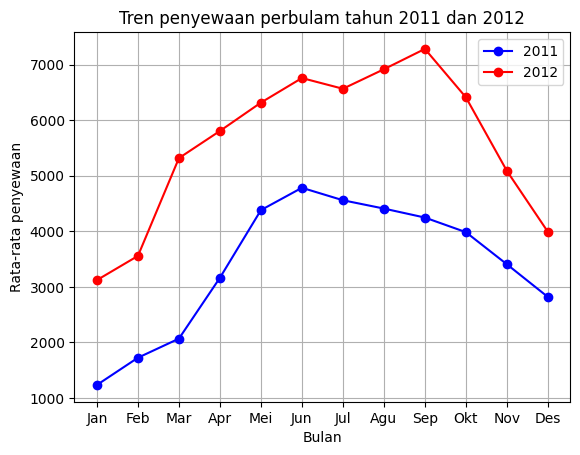

In [92]:
# Mengelompokkan data berdasarkan tahun dan bulan, lalu menghitung rata-rata peminjaman
monthly_trend = day_df.groupby(["yr", "mnth"])["cnt"].mean().reset_index()
# Untuk tahun 2011 (yr = 0)
plt.plot(
    monthly_trend[monthly_trend["yr"] == 0]["mnth"], 
    monthly_trend[monthly_trend["yr"] == 0]["cnt"], 
    marker="o", linestyle="-", label="2011", color="blue"
)
# Untuk tahun 2012 (yr = 1)
plt.plot(
    monthly_trend[monthly_trend["yr"] == 1]["mnth"], 
    monthly_trend[monthly_trend["yr"] == 1]["cnt"], 
    marker="o", linestyle="-", label="2012", color="red"
)
# Memembuat label dan judul
plt.xlabel("Bulan")
plt.ylabel("Rata-rata penyewaan")
plt.title("Tren penyewaan perbulam tahun 2011 dan 2012")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()


### Pertanyaan 2: Bagaimana variasi jumlah penyewaan sepeda pada setiap hari dalam seminggu?

C:\Users\User\AppData\Local\Temp\ipykernel_16472\2586932105.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=weekday_clm, palette=colors)


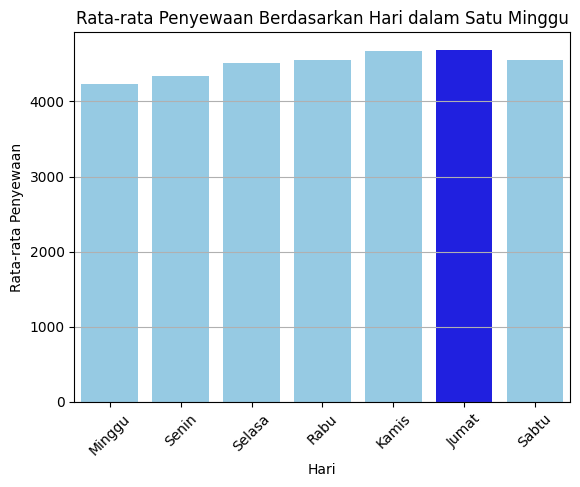

In [100]:
# Menghitung rata-rata penyewaan berdasarkan weekday (hari dalam satu minggu 0-6)
weekday_clm = day_df.groupby("weekday")["cnt"].mean().reset_index()

# Ubah angka weekday ke nama hari (0 = Minggu, 6 = Sabtu)
hari = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]
weekday_clm["weekday"] = weekday_clm["weekday"].apply(lambda x: hari[x])

# Tentukan warna, dengan Jumat lebih pekat (biru) dan lainnya abu-abu
colors = ["#89CFF0" if day != "Jumat" else "blue" for day in weekday_clm["weekday"]]

# Membuat bar plot dengan warna yang disesuaikan
sns.barplot(x="weekday", y="cnt", data=weekday_clm, palette=colors)

# Menambahkan label dan judul
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Rata-rata Penyewaan Berdasarkan Hari dalam Satu Minggu")
plt.xticks(rotation=45)  # Memiringkan label agar lebih terbaca
plt.grid(axis="y", linestyle="-")

# Menampilkan plot
plt.show()

### Pertanyaan 3: Pada jam berapa dalam sehari jumlah penyewaan sepeda paling tinggi dan paling rendah?

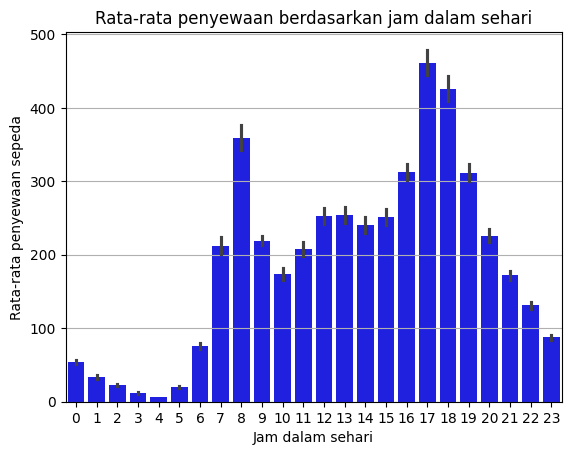

In [94]:
# Membuat bar plot
sns.barplot(x="hr", y="cnt", data=hour_df, color="blue")
# Menambahkan label dan judul
plt.xlabel("Jam dalam sehari")
plt.ylabel("Rata-rata penyewaan sepeda")
plt.title("Rata-rata penyewaan berdasarkan jam dalam sehari")
plt.xticks(range(0, 24))  # Menampilkan semua jam dari 0-23
plt.grid(axis="y", linestyle="-")
# Menampilkan plot
plt.show()

**Insight:**
- Ditahun 2011 penyewaan terbanyak pada bulan juni dan paling rendah pada bulan januari. Sedangakan tahun 2012 peminjaman terbanyak pada bulan September dan terendan pada januari
- Penyewaan rata-rata tiap minggunya tidak terlalu signifikan jumlahnya. Namun penyewaan terbanyak pada hari jum'at.
- Penyewaan meningkat pada waktu pagi hari dan sore hari

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Kapan jumlah penyewaan sepeda mencapai tingkat tertinggi dan terendah?
    - Peminjaman tahun 2012 lebih tinggi dibandingkan tahun 2011
    - Mei-Agustus memiliki penyewaan tertinggi dan Desember-Februari memiliki penyewaan terendah.
- Conclution pertanyaan 2: Bagaimana variasi jumlah penyewaan sepeda pada setiap hari dalam seminggu?
    - Hari kerja (senin sampai jum'at) cenderung memiliki jumlah penyewaan lebih tinggi dibandingkan akhir peka.
    - Sabtu & minggu memiliki penyewaan lebih rendah
    - Penyewaan terbanyak biasanya terjadi pada hari kerja
- Conclution pertanyaan 3: Pada jam berapa dalam sehari jumlah penyewaan sepeda paling tinggi dan paling rendah?
    - Dua puncak penyewaan pada pagi hari (07.00-09.00) dan sore hari (17.00-19.00)
    - Penyewaan paling sedikit terhadi pada pukul 00.00-05.00.
    - Setelah pukul 21.00 penyewaan menurun drastis.



In [101]:
hour_df.to_csv("hour_data.csv", index=False)


In [102]:
day_df.to_csv("day_data.csv", index=False)